# Algerian Forest fire ML_Linear_Regression , Perform Metrics Practical Implimenttation

# 1) Problem Statement
* The dataset comprises of two regions of algeria, namely the Bejaria region located in the northest of Algeria and the Sidi Bel_abbes region located in the northwest of Algeria
* If user can pridict the temprature based on the diffrent-diffrent feature.
* Pridiction result can be used for forest fire situation trackers & make correct preventions to avoid it in future.
* Build → Logistic regression model . This is imbal or bal. Accuracy→ it may be biassed. If it is not imbalanced –create a model→90 % accuracy
* Second thing if data imbalance
1. you have to create a model and observe precision or recall or f1 score

2. You can handle imbalanced data and then try to find out 90 percent accuracy on top of the dataset.



#  2) Data Collection
* The dataset is collected from website named UCI Machine Learning Reprository.
* The data consists of 15 columns and 244 rows.

**Importing Required libraries for EDA**

*the main aim is to understand data in better way*

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

**Loading Dataset**

In [7]:
df = pd.read_csv(r"E:\DATA science\INeuron assienment\Eda class 01-10-2022\Algirian forest fire dataset\Algerian_forest_fires_dataset_UPDATE.csv", header=1)

**Top 5 records**

In [5]:
df.head()

,,,,,,,,,,,,,Bejaia Region Dataset
day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire


# 3) DATA Cleaning

**Moving Unnecessary rows from dataset**

In [8]:
df.drop(index=[122,123], inplace=True)
df.reset_index(inplace=True)
df.drop('index', axis=1, inplace=True)

In [9]:
##adding new feature , named "region" in a dataset

df.loc[:122, 'region'] = 'bejaia'
df.loc[122:, 'region'] = 'Sidi-Bel Abbes'

In [10]:
##Stripping the names of the columns

df.columns = [i.strip() for i in df.columns]
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'region'],
      dtype='object')

In [11]:
## Stripping the classes features data

df.Classes=df.Classes.str.strip()
df['Classes'].unique()

array(['not fire', 'fire', nan], dtype=object)

In [13]:
df['Classes'].dtype

dtype('O')

In [15]:
## chack  the datatype

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          244 non-null    object
 1   month        244 non-null    object
 2   year         244 non-null    object
 3   Temperature  244 non-null    object
 4   RH           244 non-null    object
 5   Ws           244 non-null    object
 6   Rain         244 non-null    object
 7   FFMC         244 non-null    object
 8   DMC          244 non-null    object
 9   DC           244 non-null    object
 10  ISI          244 non-null    object
 11  BUI          244 non-null    object
 12  FWI          244 non-null    object
 13  Classes      243 non-null    object
 14  region       244 non-null    object
dtypes: object(15)
memory usage: 28.7+ KB


In [20]:
## changing the datatypes of the columns

df['day']=df['day'].astype(int)
df['month']=df['month'].astype(int)
df['year']=df['year'].astype(int)
df['Temperature']=df['Temperature'].astype(int)
df['RH']=df['RH'].astype(int)
df['Ws']=df['Ws'].astype(float)
df['Rain']=df['Rain'].astype(float)
df['FFMC']=df['FFMC'].astype(float)
df['DMC']=df['DMC'].astype(float)
df['ISI']=df['ISI'].astype(float)
df['BUI']=df['BUI'].astype(float)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          244 non-null    int32  
 1   month        244 non-null    int32  
 2   year         244 non-null    int32  
 3   Temperature  244 non-null    int32  
 4   RH           244 non-null    int32  
 5   Ws           244 non-null    float64
 6   Rain         244 non-null    float64
 7   FFMC         244 non-null    float64
 8   DMC          244 non-null    float64
 9   DC           244 non-null    object 
 10  ISI          244 non-null    float64
 11  BUI          244 non-null    float64
 12  FWI          244 non-null    object 
 13  Classes      243 non-null    object 
 14  region       244 non-null    object 
dtypes: float64(6), int32(5), object(4)
memory usage: 24.0+ KB


In [24]:
## Adding new feature , named'Date' by Replacing Unnecessary feature like'date,month,year'

df['date'] = pd.to_datetime(df[['day','month','year']])
df.drop(['day','month','year'], axis=1, inplace=True)

In [25]:
df.sample()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,region,date
239,30,65,14.0,0.0,85.4,16.0,44.5,4.5,16.9,6.5,fire,Sidi-Bel Abbes,2012-09-26


# 4) Exploring Data

**4.1) Profile of the Data**

In [26]:
df.shape

(244, 13)

**observation: in this 244 Rows and 13 columns**

**Chack if missing value present or not in dataset**

In [27]:
df.isnull().sum()

Temperature    0
RH             0
Ws             0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        1
region         0
date           0
dtype: int64

*observation: we got one null value in 'Classes' feature*

In [28]:
## unique value of classes feature

df['Classes'].unique()

array(['not fire', 'fire', nan], dtype=object)

**heandling categorical feature classes**

In [29]:
df['Classes']=df['Classes'].map({'not fire':0, 'fire':1})
df.head(2)

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,region,date
0,29,57,18.0,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0.0,bejaia,2012-06-01
1,29,61,13.0,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0.0,bejaia,2012-06-02


In [30]:
## replace null value using mode

df['Classes'].mode()[0]

1.0

In [31]:
df['Classes']=df['Classes'].fillna(df['Classes'].mode()[0])

In [32]:
df.isnull().sum()

Temperature    0
RH             0
Ws             0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
region         0
date           0
dtype: int64

*Observation: now we have zero null value

In [33]:
df['Classes'].unique()

array([0., 1.])

In [34]:
## Now chack datatypes & null values

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Temperature  244 non-null    int32         
 1   RH           244 non-null    int32         
 2   Ws           244 non-null    float64       
 3   Rain         244 non-null    float64       
 4   FFMC         244 non-null    float64       
 5   DMC          244 non-null    float64       
 6   DC           244 non-null    object        
 7   ISI          244 non-null    float64       
 8   BUI          244 non-null    float64       
 9   FWI          244 non-null    object        
 10  Classes      244 non-null    float64       
 11  region       244 non-null    object        
 12  date         244 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(7), int32(2), object(3)
memory usage: 23.0+ KB


*Observation: there only 3 columns are object*

In [36]:
## chack the memory usage

df.memory_usage()

Index           128
Temperature     976
RH              976
Ws             1952
Rain           1952
FFMC           1952
DMC            1952
DC             1952
ISI            1952
BUI            1952
FWI            1952
Classes        1952
region         1952
date           1952
dtype: int64

**Numerical and catogorical Columns**

*Numerical dataset*

In [47]:
#1. getting numerical feature from dataset
#2. creating numerical dataframes

numerical_features = [feature for feature in df.columns if df[feature].dtype != 'O']
# print numerical feature
print('We have {} numerical feature : {}'.format(len(numerical_features), numerical_features))

We have 10 numerical feature : ['Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'ISI', 'BUI', 'Classes', 'date']


*Categorical dataset*

In [39]:
#1. getting categorical feature from dataset
#2. creating categorical dataframes

categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

# print numerical feature
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))


We have 3 categorical features : ['DC', 'FWI', 'region']


**Feature Information**

In [40]:
df.head(2)

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,region,date
0,29,57,18.0,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0.0,bejaia,2012-06-01
1,29,61,13.0,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0.0,bejaia,2012-06-02


**Univariate Analysis**

* The term univariate analysis refers to the analysis of one variable prefix “uni” means “one.” The purpose of univariate analysis is to understand the distribution of values for a single variable

In [41]:
df.var()

Temperature     13.204817
RH             221.539415
Ws               7.897102
Rain             3.997623
FFMC           205.565939
DMC            152.968382
ISI             17.433281
BUI            201.777024
Classes          0.246711
dtype: float64

**Numerical Features**

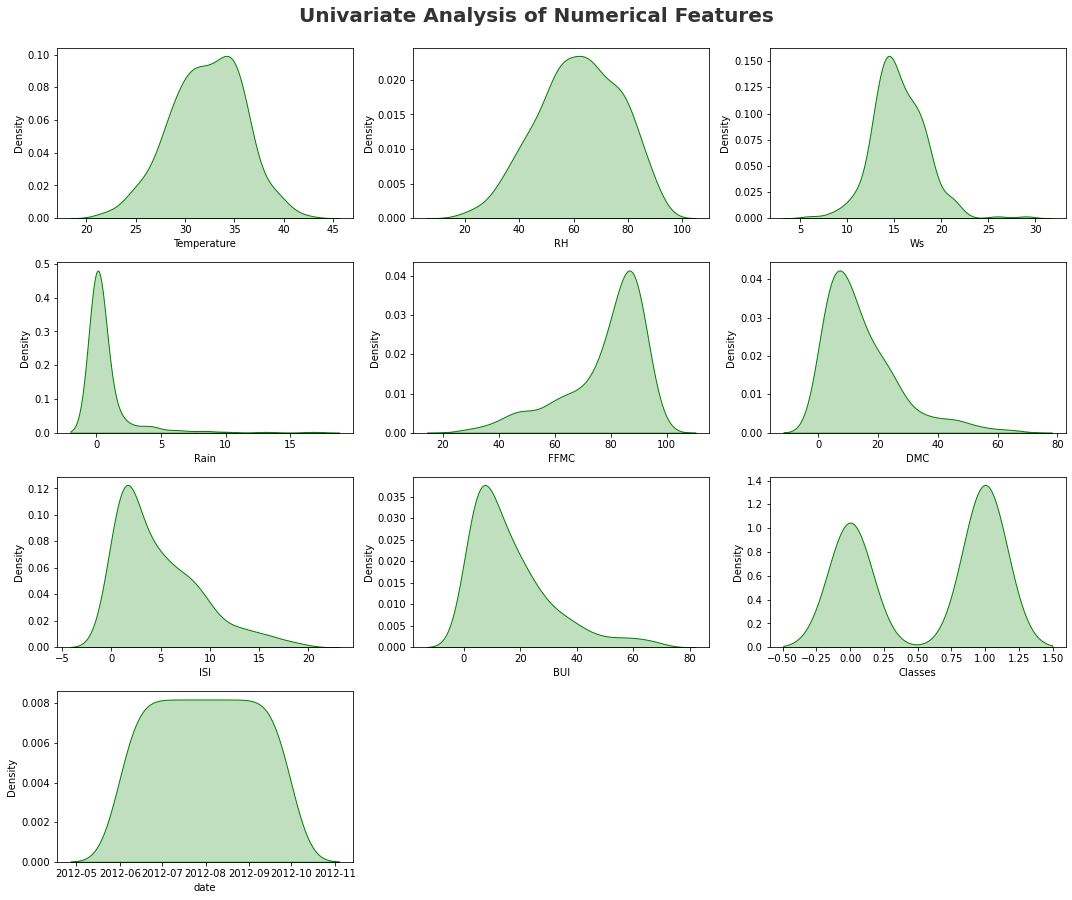

In [48]:
plt.figure(figsize=(15, 15))
plt.suptitle('Univariate Analysis of Numerical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)

for i in range(0, len(numerical_features)):
    plt.subplot(5, 3, i+1)
    sns.kdeplot(x=df[numerical_features[i]],shade=True, color='g')
    plt.xlabel(numerical_features[i])
    plt.tight_layout()

**Categorical Features**

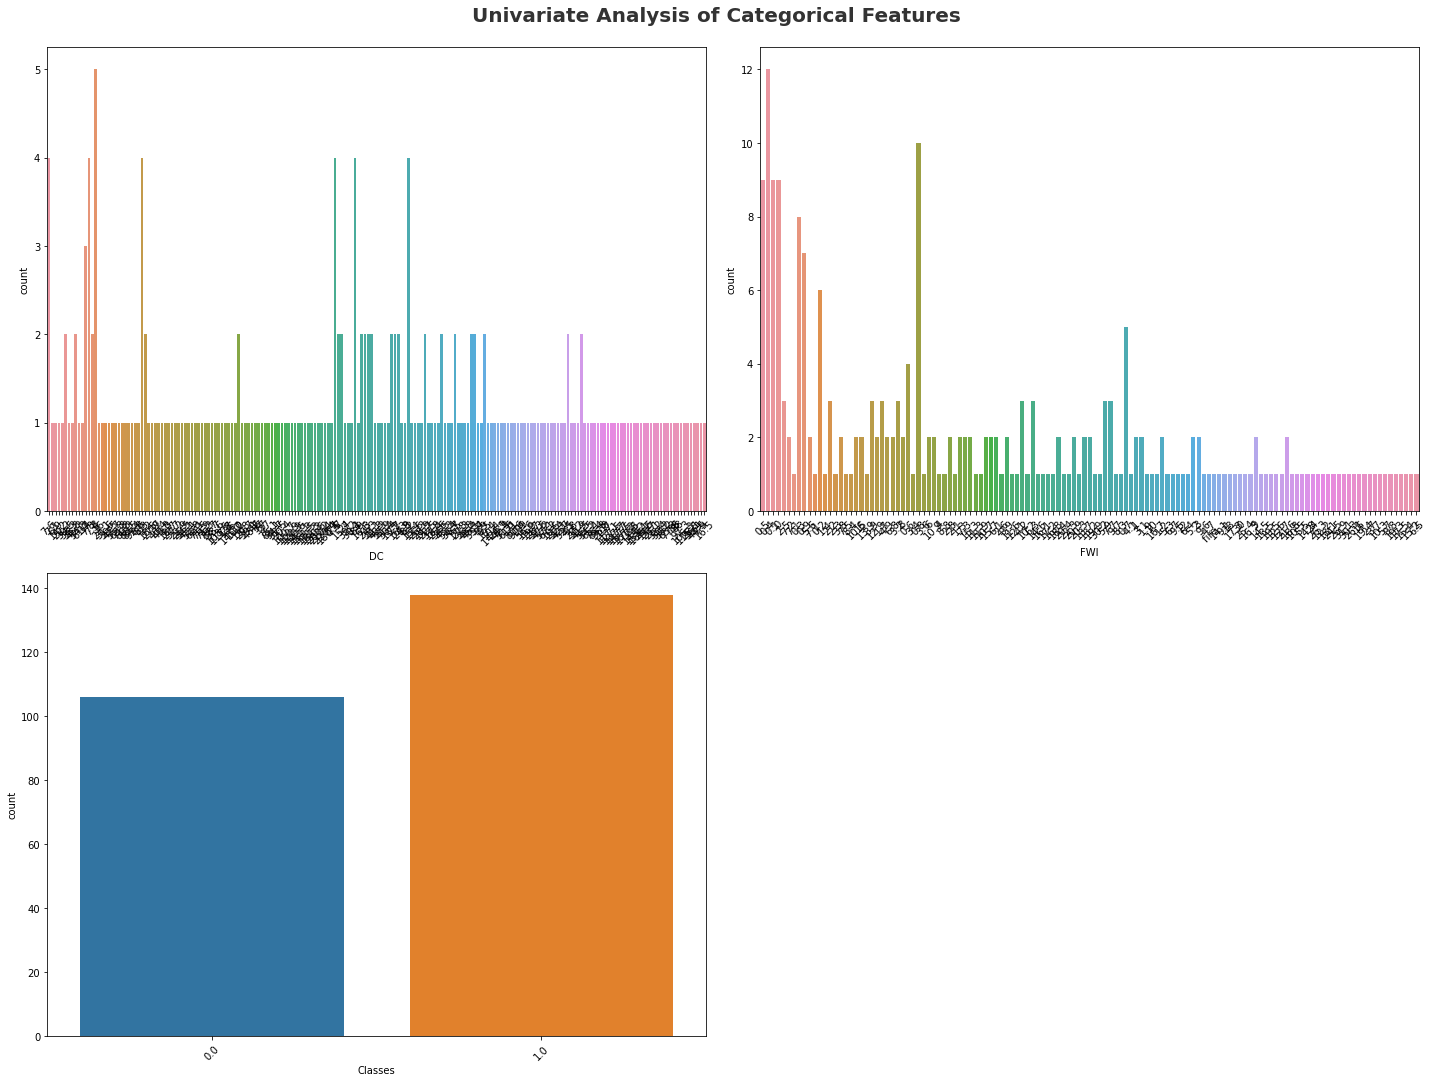

In [51]:
# categorical columns
plt.figure(figsize=(20, 15))
plt.suptitle('Univariate Analysis of Categorical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)
cat1 = [ 'DC', 'FWI', 'Classes']
for i in range(0, len(cat1)):
    plt.subplot(2, 2, i+1)
    sns.countplot(x=df[cat1[i]])
    plt.xlabel(cat1[i])
    plt.xticks(rotation=45)
    plt.tight_layout()

*observation: *extreme value of temprature is above 40
             *most of time RH is above 30
              *WS values lie b/w 10 to 20*

***Multivariate Analysis***:
*Multivariate analysis is the analysis of more than one variable.*

In [52]:
df.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,ISI,BUI,Classes
Temperature,1.000000,-0.654443,-0.278132,-0.326786,0.677491,0.483105,0.607551,0.455504,0.518119
RH,-0.654443,1.000000,0.236084,0.222968,-0.645658,-0.405133,-0.690637,-0.348587,-0.435023
Ws,-0.278132,0.236084,1.000000,0.170169,-0.163255,-0.001246,0.015248,0.029756,-0.066529
Rain,-0.326786,0.222968,0.170169,1.000000,-0.544045,-0.288548,-0.347105,-0.299171,-0.379449
FFMC,0.677491,-0.645658,-0.163255,-0.544045,1.000000,0.602391,0.739730,0.589652,0.770114
DMC,0.483105,-0.405133,-0.001246,-0.288548,0.602391,1.000000,0.674499,0.982073,0.584188
ISI,0.607551,-0.690637,0.015248,-0.347105,0.739730,0.674499,1.000000,0.635891,0.735511
BUI,0.455504,-0.348587,0.029756,-0.299171,0.589652,0.982073,0.635891,1.000000,0.583882
Classes,0.518119,-0.435023,-0.066529,-0.379449,0.770114,0.584188,0.735511,0.583882,1.000000


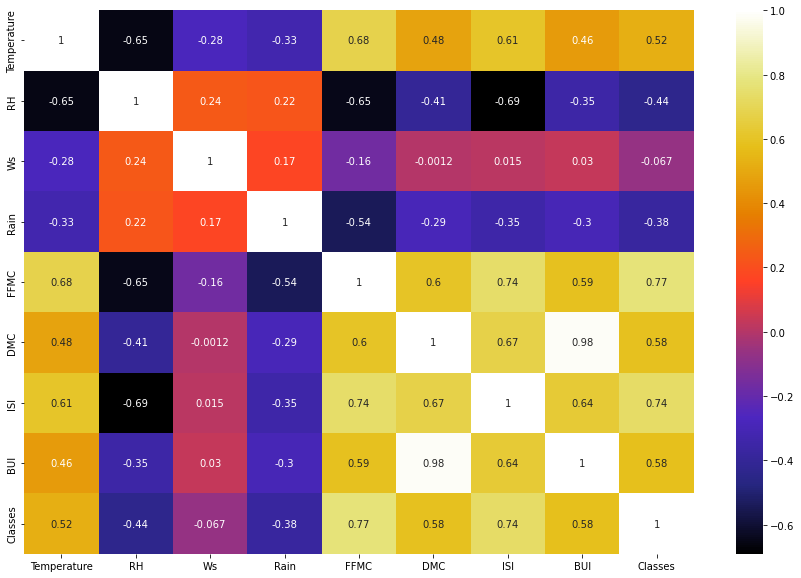

In [53]:
#Plotting heatmap
plt.figure(figsize = (15,10))
sns.heatmap(df.corr(), cmap="CMRmap", annot=True)
plt.show()

<AxesSubplot:>

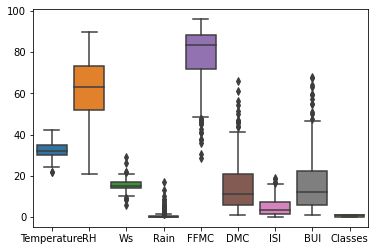

In [54]:
## Boxplot to find the outliers
sns.boxplot(data = df , orient="v")

**Statical Analysis**

In [55]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Temperature,244.0,32.172131,3.633843,22.0,30.000,32.00,35.000,42.0
RH,244.0,61.938525,14.884200,21.0,52.000,63.00,73.250,90.0
Ws,244.0,15.504098,2.810178,6.0,14.000,15.00,17.000,29.0
Rain,244.0,0.760656,1.999406,0.0,0.000,0.00,0.500,16.8
FFMC,244.0,77.887705,14.337571,28.6,72.075,83.50,88.300,96.0
DMC,244.0,14.673361,12.368039,0.7,5.800,11.30,20.750,65.9
ISI,244.0,4.774180,4.175318,0.0,1.400,3.50,7.300,19.0
BUI,244.0,16.664754,14.204824,1.1,6.000,12.25,22.525,68.0
Classes,244.0,0.565574,0.496700,0.0,0.000,1.00,1.000,1.0


<AxesSubplot:xlabel='region', ylabel='Temperature'>

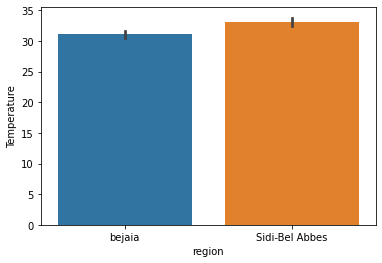

In [56]:
sns.barplot(x="region", y="Temperature", data=df)

**Visualization**

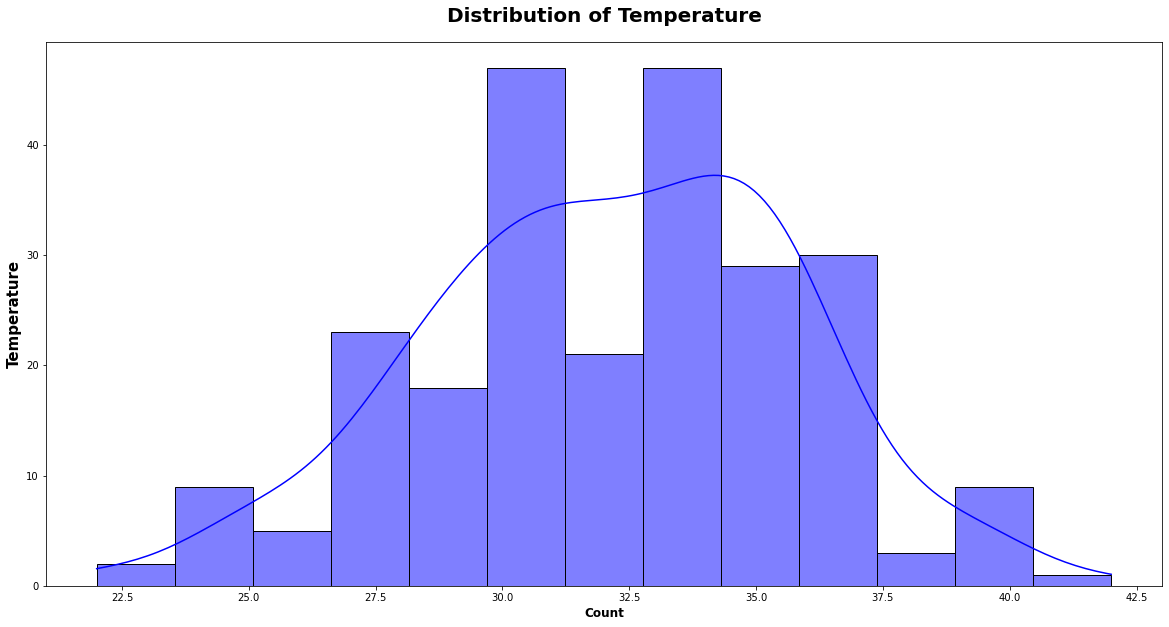

In [58]:
plt.subplots(figsize=(20,10))
sns.histplot("Distribution of Temperature", x=df.Temperature, kde=True, color = 'b')
plt.title("Distribution of Temperature", weight="bold",fontsize=20, pad=20)
plt.ylabel("Temperature", weight="bold", fontsize=15)
plt.xlabel("Count", weight="bold", fontsize=12)
plt.show()

<AxesSubplot:xlabel='Temperature', ylabel='Classes'>

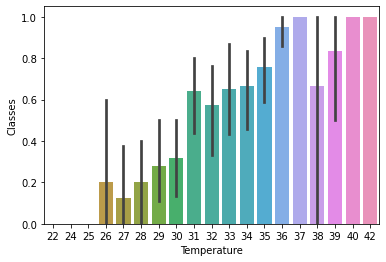

In [60]:
sns.barplot(x="Temperature", y='Classes',data=df)

<AxesSubplot:xlabel='Temperature', ylabel='Rain'>

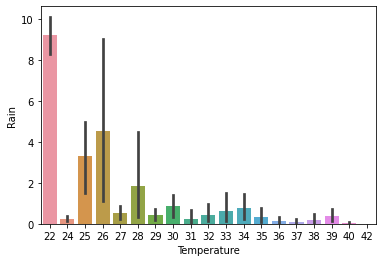

In [61]:
sns.barplot(x="Temperature", y='Rain',data=df)

<AxesSubplot:>

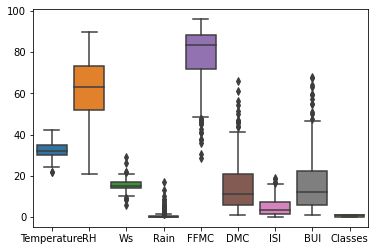

In [63]:
sns.boxplot(orient="v",data=df)

<AxesSubplot:xlabel='Classes', ylabel='Temperature'>

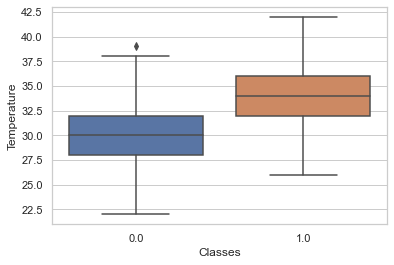

In [65]:
sns.set(style="whitegrid")

sns.boxplot(x="Classes", y='Temperature',data=df)

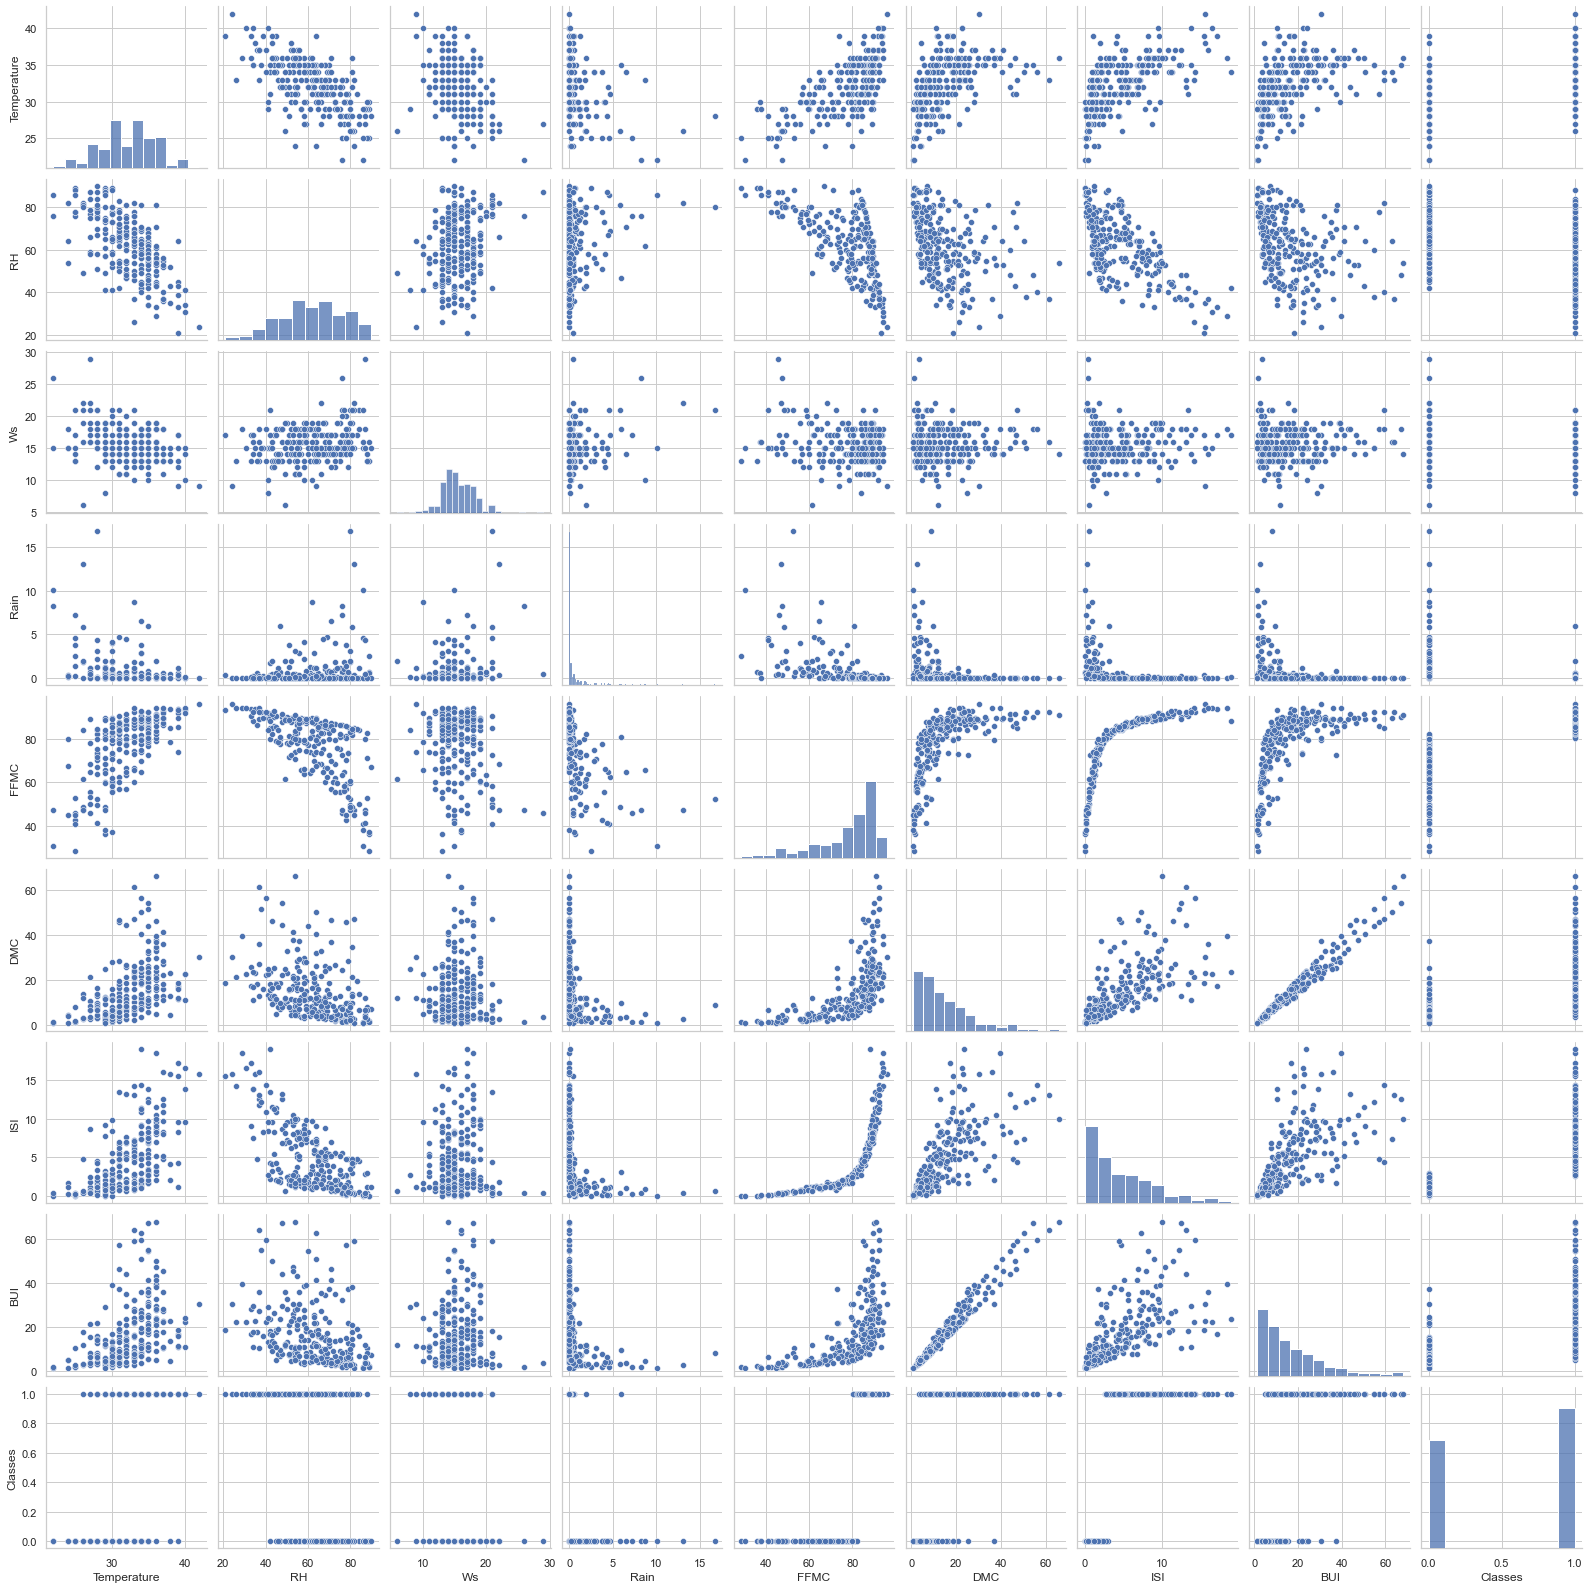

In [66]:
sns.pairplot(df)

# data cleaning for better model prediction

In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Temperature  244 non-null    int32         
 1   RH           244 non-null    int32         
 2   Ws           244 non-null    float64       
 3   Rain         244 non-null    float64       
 4   FFMC         244 non-null    float64       
 5   DMC          244 non-null    float64       
 6   DC           244 non-null    object        
 7   ISI          244 non-null    float64       
 8   BUI          244 non-null    float64       
 9   FWI          244 non-null    object        
 10  Classes      244 non-null    float64       
 11  region       244 non-null    object        
 12  date         244 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(7), int32(2), object(3)
memory usage: 23.0+ KB


In [68]:
df['DC'].dtype

dtype('O')

In [69]:
df =df.drop(columns = ('DC'), axis=1)
df =df.drop(columns = ('FWI'), axis=1)

In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Temperature  244 non-null    int32         
 1   RH           244 non-null    int32         
 2   Ws           244 non-null    float64       
 3   Rain         244 non-null    float64       
 4   FFMC         244 non-null    float64       
 5   DMC          244 non-null    float64       
 6   ISI          244 non-null    float64       
 7   BUI          244 non-null    float64       
 8   Classes      244 non-null    float64       
 9   region       244 non-null    object        
 10  date         244 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(7), int32(2), object(1)
memory usage: 19.2+ KB


**dependent and Independent feature**

In [71]:
x = df.iloc[:, 1:-2]
y = df.iloc[:,0]

In [72]:
x

,RH,Ws,Rain,FFMC,DMC,ISI,BUI,Classes
0,57,18.0,0.0,65.7,3.4,1.3,3.4,0.0
1,61,13.0,1.3,64.4,4.1,1.0,3.9,0.0
2,82,22.0,13.1,47.1,2.5,0.3,2.7,0.0
3,89,13.0,2.5,28.6,1.3,0.0,1.7,0.0
4,77,16.0,0.0,64.8,3.0,1.2,3.9,0.0
...,...,...,...,...,...,...,...,...
239,65,14.0,0.0,85.4,16.0,4.5,16.9,1.0
240,87,15.0,4.4,41.1,6.5,0.1,6.2,0.0
241,87,29.0,0.5,45.9,3.5,0.4,3.4,0.0
242,54,18.0,0.1,79.7,4.3,1.7,5.1,0.0


In [73]:
y

0      29
1      29
2      26
3      25
4      27
       ..
239    30
240    28
241    27
242    24
243    24
Name: Temperature, Length: 244, dtype: int32

In [74]:
from sklearn.model_selection import train_test_split

In [75]:
X_train, X_test, y_train, y_test = train_test_split(
     x, y, test_size=0.33, random_state=10)

In [76]:
X_train

,RH,Ws,Rain,FFMC,DMC,ISI,BUI,Classes
237,49,6.0,2.0,61.3,11.9,0.6,11.9,0.0
78,54,18.0,0.0,89.4,20.0,9.7,27.5,1.0
25,64,18.0,0.0,86.8,17.8,6.7,21.6,1.0
124,80,14.0,2.0,48.7,2.2,0.3,2.6,0.0
176,64,9.0,1.2,73.8,11.7,1.1,11.4,0.0
...,...,...,...,...,...,...,...,...
64,69,13.0,0.0,85.0,8.2,4.0,8.2,1.0
15,89,13.0,0.7,36.1,1.7,0.0,2.2,0.0
228,51,13.0,0.0,88.7,16.0,6.9,17.8,1.0
125,64,14.0,0.0,79.4,5.2,2.2,5.6,0.0


In [77]:
X_train.shape

(163, 8)

In [78]:
X_test.shape

(81, 8)

In [79]:
y_test.shape

(81,)

In [80]:
y_train.shape

(163,)

In [81]:
## Standardize the datasets
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [82]:
scaler

StandardScaler()

In [83]:
X_train=scaler.fit_transform(X_train)

In [84]:
X_test=scaler.transform(X_test)
##we do not want leakage the data

In [85]:
X_train

array([[-0.85631108, -3.36419461,  0.88853946, ..., -0.9695694 ,
        -0.32535487, -1.06992376],
       [-0.52508491,  0.99944243, -0.441414  , ...,  1.17918645,
         0.76565444,  0.93464604],
       [ 0.13736742,  0.99944243, -0.441414  , ...,  0.4708054 ,
         0.35302912,  0.93464604],
       ...,
       [-0.72382061, -0.81873967, -0.441414  , ...,  0.5180308 ,
         0.08727045,  0.93464604],
       [ 0.13736742, -0.45510325, -0.441414  , ..., -0.59176617,
        -0.76595478, -1.06992376],
       [ 1.13104591, -1.18237609, -0.441414  , ..., -0.80428049,
        -0.27639932, -1.06992376]])

In [86]:
X_test

array([[-3.92594448e-01, -9.14668296e-02,  1.48701853e+00,
        -1.82411230e-01, -6.02677495e-01, -7.33442383e-01,
        -6.82030988e-01, -1.06992376e+00],
       [ 1.37367416e-01,  6.35806011e-01, -4.41414004e-01,
         6.64566895e-01,  1.37979749e+00,  4.94418103e-01,
         1.72378441e+00,  9.34646039e-01],
       [-1.12129201e+00, -4.55103250e-01, -4.41414004e-01,
         9.08075201e-02, -7.86536062e-01, -6.38991577e-01,
        -8.28897625e-01, -1.06992376e+00],
       [ 7.11221826e-02, -4.55103250e-01, -2.41920984e-01,
        -5.94627923e-02, -7.14591405e-01, -7.09829682e-01,
        -7.72948430e-01, -1.06992376e+00],
       [-1.93858749e-01,  6.35806011e-01, -4.41414004e-01,
         6.78227832e-01,  1.28490116e-02,  5.18030804e-01,
         9.42640966e-02,  9.34646039e-01],
       [-5.91330147e-01,  2.72169591e-01, -4.41414004e-01,
         8.21667676e-01,  1.83544698e+00,  1.34447536e+00,
         2.16438432e+00,  9.34646039e-01],
       [-5.91330147e-01,  1.363078

# Model Training
**Linear Regression Model prediction**

In [87]:
from sklearn.linear_model import LinearRegression

In [88]:
regression=LinearRegression()

In [89]:
regression

LinearRegression()

In [90]:
regression.fit(X_train,y_train)    #send the data and train the data

LinearRegression()

**Print the cofficients and the intercept**

In [91]:
##Print the cofficients and the intercept
print(regression.coef_)

[-1.29919854 -0.53305266 -0.24467182  0.92858531 -0.34598758  0.07149294
  0.72141012  0.15855047]


In [92]:
print(regression.intercept_) #price of the house , / all independent featuer are zero

32.17791411042945


In [93]:
## Prediction for the test data
reg_pred=regression.predict(X_test)

In [94]:
reg_pred

array([31.69793497, 33.3353358 , 33.52844942, 31.80132345, 33.07743259,
       34.84275471, 33.61175721, 33.46247307, 32.16426973, 33.10278482,
       33.69530552, 27.78603314, 35.37932299, 29.2902435 , 32.1668506 ,
       32.00338801, 34.0988015 , 28.25045526, 36.11064295, 34.49490401,
       32.86731849, 33.56668086, 33.75080481, 32.91743417, 35.77454234,
       28.74173763, 32.20737033, 33.19893452, 27.78209499, 32.18472108,
       26.15107265, 26.92722327, 34.10776387, 31.98651558, 33.00689815,
       30.46739878, 28.89861899, 32.56323949, 27.84591829, 35.38936998,
       32.54493305, 34.10484566, 33.98890395, 31.19087746, 36.40498435,
       34.20350051, 24.80791843, 35.1270552 , 33.91336638, 29.52362175,
       31.30096324, 32.60667273, 35.73093891, 32.30080434, 30.40319541,
       30.13288547, 32.88039608, 36.27194553, 31.24388019, 33.47744575,
       32.48117904, 32.72111765, 31.18249581, 24.58531655, 31.60333681,
       36.04361167, 29.39256881, 29.8117875 , 34.99220619, 33.58

**Assumption of linear regression**

Text(0, 0.5, 'Test predicted Data')

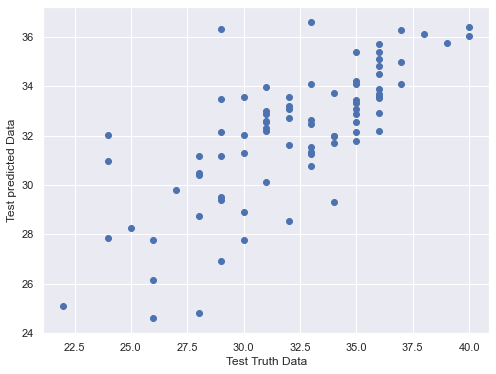

In [95]:
sns.set(rc={'figure.figsize':(8,6)})
plt.scatter(y_test,reg_pred)
plt.xlabel("Test Truth Data")
plt.ylabel("Test predicted Data")

In [96]:
##Calculating residuals
residuals=y_test-reg_pred

In [97]:
residuals

162    2.302065
60     1.664664
61     2.471551
63     3.198677
69     1.922567
         ...   
169    0.369605
232   -7.337625
144    1.452763
208   -3.613623
105   -3.111265
Name: Temperature, Length: 81, dtype: float64

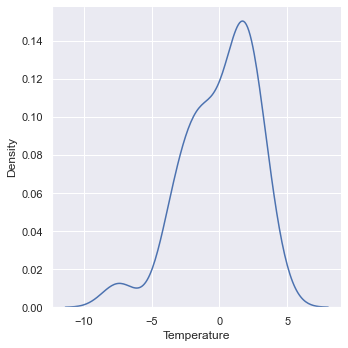

In [98]:
sns.displot(residuals,kind="kde")

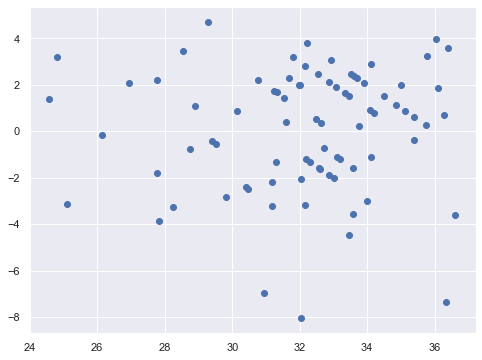

In [99]:
## Scatter plot with predictions and residual
## uniform Distribution
plt.scatter(reg_pred , residuals)

*model is good and uniform distribution(homoscedasticity)*

# Performence metrics

In [100]:
## preformance Metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
print(mean_squared_error(y_test,reg_pred))
print(mean_absolute_error(y_test,reg_pred))
print(np.sqrt(mean_squared_error(y_test,reg_pred)))

6.954871737664067
2.175574643410082
2.6372090811431823


**r square and adjusted R square**

In [101]:
from sklearn.metrics import r2_score
score=r2_score(y_test, reg_pred)
print(score)

0.5400944035274451


In [102]:
## Adjusted R square
#display adjusted R-squared
1 - (1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

0.48899378169716123

# Ridge regression Model prediction

In [103]:
## Ridge regression
from sklearn.linear_model import Ridge
ridge=Ridge()

In [104]:
ridge.fit(X_train,y_train)

Ridge()

In [105]:
pred_train_ridge=ridge.predict(X_train)
print(np.sqrt(mean_squared_error(y_train,pred_train_ridge)))
print(r2_score(y_train, pred_train_ridge))


2.2870019714483205
0.5702519326567217


In [106]:
pred_test_ridge= ridge.predict(X_test)
print(np.sqrt(mean_squared_error(y_test,pred_test_ridge))) 
print(r2_score(y_test, pred_test_ridge))

2.635513135748224
0.540685728644297


**print coefficient and the intercept**

In [107]:
print(ridge.coef_)

[-1.2794179  -0.53077265 -0.2465204   0.92569657 -0.18919001  0.07649494
  0.56658722  0.16202852]


In [108]:
print(ridge.intercept_)

32.17791411042945


In [109]:
ridge_pred =ridge.predict(X_test)

In [110]:
ridge_pred

array([31.69144444, 33.2935903 , 33.50387348, 31.80266374, 33.06716673,
       34.79279395, 33.56245552, 33.37662923, 32.16841261, 33.10340339,
       33.73044254, 27.79847742, 35.3664068 , 29.28757963, 32.16049309,
       32.03644783, 34.08602833, 28.26049871, 36.12504216, 34.53978659,
       32.85348434, 33.49239279, 33.73559957, 32.94785926, 35.78078545,
       28.78247581, 32.16115609, 33.18222939, 27.80160773, 32.1573772 ,
       26.17225893, 26.95070529, 34.10125837, 31.97467139, 32.98839516,
       30.46023192, 28.90164342, 32.56410602, 27.86157493, 35.33116087,
       32.50740792, 34.14556116, 34.00825729, 31.19601771, 36.39691995,
       34.1901192 , 24.82779667, 35.12583298, 33.94222249, 29.53840954,
       31.30561469, 32.60961155, 35.74614361, 32.30020832, 30.42867201,
       30.12133671, 32.90798988, 36.29000623, 31.26246543, 33.476286  ,
       32.45715913, 32.69016291, 31.17800724, 24.59682778, 31.58162674,
       36.03399076, 29.437915  , 29.77831333, 35.0032777 , 33.58

**Assumption of Ridge Regression:**

Text(0, 0.5, 'Test predicted Data')

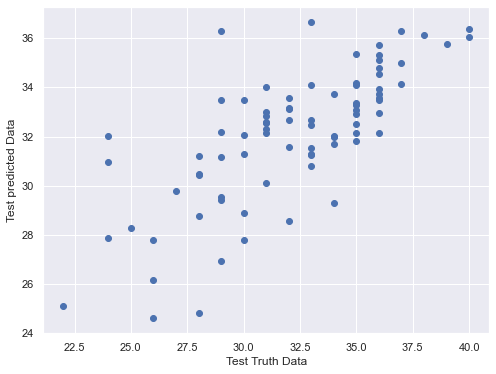

In [111]:
plt.scatter(y_test,ridge_pred)
plt.xlabel("Test Truth Data")
plt.ylabel("Test predicted Data")

In [116]:
## residuals
residuals=y_test - ridge_pred

In [117]:
residuals

162    2.308556
60     1.706410
61     2.496127
63     3.197336
69     1.932833
         ...   
169    0.322393
232   -7.299407
144    1.451964
208   -3.663754
105   -3.118553
Name: Temperature, Length: 81, dtype: float64

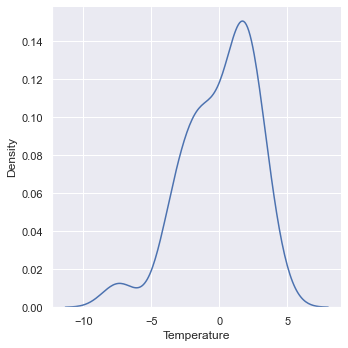

In [118]:
sns.displot(residuals,kind="kde")

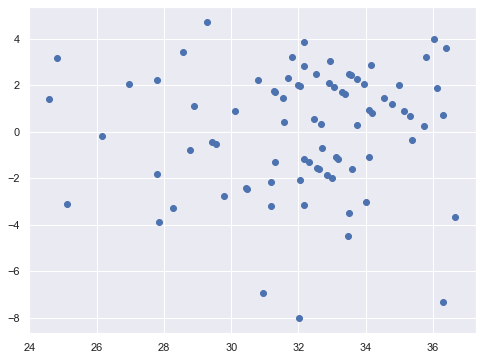

In [119]:
plt.scatter(ridge_pred , residuals)

**preformance Metrics**

In [123]:
## preformance Metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
print(mean_squared_error(y_test,ridge_pred))
print(mean_absolute_error(y_test,ridge_pred))
print(np.sqrt(mean_squared_error(y_test,ridge_pred)))

6.945929488701437
2.17678023475141
2.635513135748224


**R square and adjusted R square**

In [163]:
from sklearn.metrics import r2_score
score=r2_score(y_test, reg_pred)
print(score)

0.5400944035274451


In [164]:
## Adjusted R square
#display adjusted R-squared
1 - (1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

0.48899378169716123

# Lasso regression Model prediction

In [128]:
from sklearn.linear_model import Lasso

In [129]:
lasso = Lasso()

In [130]:
lasso

Lasso()

In [132]:
lasso.fit(X_train,y_train)

Lasso()

In [134]:
##Print the cofficients and the intercept
print(lasso.coef_)

[-0.71955751 -0.         -0.          0.89582004  0.          0.
  0.          0.        ]


In [135]:
print(lasso.intercept_)

32.17791411042945


In [138]:
lasso_pred=lasso.predict(X_test)

In [139]:
lasso_pred

array([32.29700076, 32.6744027 , 33.06609539, 32.07346965, 32.92497671,
       33.33947653, 33.32111992, 32.77042154, 32.11916885, 32.70983221,
       33.15976154, 30.29861247, 34.17172792, 30.95174825, 33.0931383 ,
       32.31497272, 32.93691477, 29.42489766, 34.46059856, 33.50695377,
       32.46152593, 33.02899752, 33.30888217, 32.80645043, 34.5498142 ,
       30.18680443, 32.38908351, 32.89121556, 29.47641605, 31.8492542 ,
       29.50217524, 28.6091198 , 33.21226395, 32.70054654, 32.64380834,
       31.80937418, 30.23515603, 32.53110125, 29.22810977, 33.62676377,
       32.55104126, 33.23190428, 33.93112391, 31.84411936, 34.06445535,
       33.20742879, 29.78847846, 33.80519505, 33.21966653, 30.53913152,
       31.62769114, 32.373594  , 33.92016988, 32.24993288, 31.51301599,
       31.26381066, 32.303719  , 34.28571873, 31.84095256, 33.47507571,
       32.27184094, 32.20868418, 31.42230192, 29.36272493, 32.24706577,
       34.47767146, 31.13749714, 31.41648274, 33.33947653, 33.04

**Assumptions of lasso Regression**

Text(0, 0.5, 'Test predicted Data')

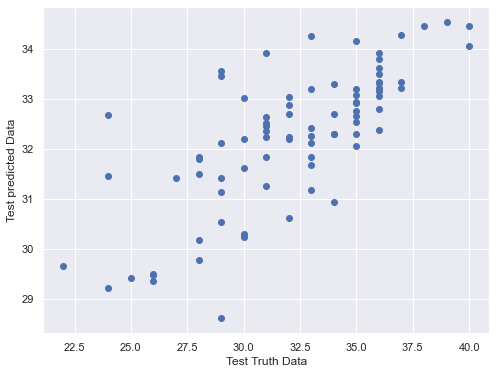

In [140]:
plt.scatter(y_test,lasso_pred)
plt.xlabel("Test Truth Data")
plt.ylabel("Test predicted Data")

In [141]:
## residuals
residuals=y_test-lasso_pred

In [142]:
residuals

162    1.702999
60     2.325597
61     2.933905
63     2.926530
69     2.075023
         ...   
169    0.583574
232   -4.568827
144    0.882714
208   -1.267362
105   -7.667085
Name: Temperature, Length: 81, dtype: float64

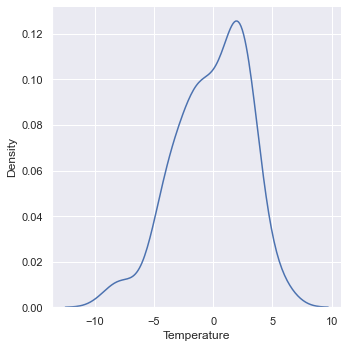

In [143]:
sns.displot(residuals,kind="kde")

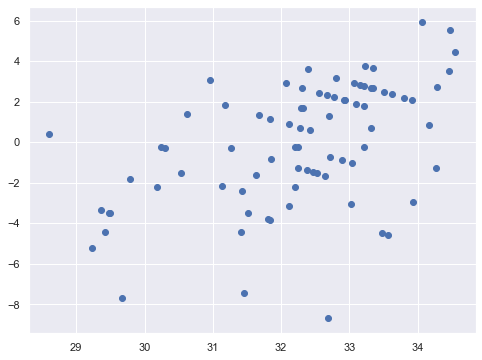

In [144]:
## Scatter plot with predictions and residual
## uniform Distribution
plt.scatter(lasso_pred , residuals)

**preformance Metrics**

In [145]:
## preformance Metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
print(mean_squared_error(y_test,lasso_pred))
print(mean_absolute_error(y_test,lasso_pred))
print(np.sqrt(mean_squared_error(y_test,lasso_pred)))

9.10609532182792
2.4978660766652734
3.0176307464346794


*r square and adjusted R square*

In [146]:
from sklearn.metrics import r2_score
score=r2_score(y_test, lasso_pred)
print(score)

0.39784019626969913


In [147]:
## Adjusted R square
#display adjusted R-squared
1 - (1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

0.33093355141077685

# Elastic net regression Model prediction

In [148]:
## Elastic net regression
from sklearn.linear_model import ElasticNet
elastic=ElasticNet()

In [149]:
elastic

ElasticNet()

In [150]:
elastic.fit(X_train, y_train)

ElasticNet()

**Print the cofficients and the intercept**

In [151]:
print(elastic.coef_)

[-0.69609015 -0.10346124 -0.01326848  0.67544389  0.10159204  0.2536889
  0.06695761  0.12353856]


In [152]:
print(elastic.intercept_)

32.17791411042945


In [153]:
## Prediction for the test data
elastic_pred=elastic.predict(X_test)

In [154]:
elastic_pred

array([31.89258205, 32.9677374 , 32.64302354, 31.70193402, 32.96553828,
       33.9101536 , 33.48248837, 32.76141763, 32.06160308, 32.74066709,
       33.38929459, 29.86338625, 34.24685756, 30.64929515, 32.81579111,
       32.30088409, 32.93037203, 29.4074105 , 35.05990855, 33.90346654,
       32.4657043 , 33.34822904, 33.50840351, 32.896049  , 35.08611865,
       29.95950714, 32.22868286, 32.50117704, 29.36405878, 32.09704512,
       29.1567074 , 28.62925758, 33.28097511, 32.23763392, 32.70304145,
       31.26486337, 29.99833358, 32.40064663, 29.17674335, 33.97883421,
       32.79943266, 33.55509173, 34.16404775, 31.66961619, 34.51885869,
       33.41160246, 29.36878451, 33.9729948 , 33.43267658, 30.26746954,
       31.53589643, 32.39408951, 34.59727739, 32.13628815, 31.44578866,
       30.86305762, 32.51240763, 34.79711616, 31.6000036 , 33.48601465,
       32.21394851, 32.45714007, 31.19768117, 28.92790324, 31.82855244,
       34.85008434, 30.74918395, 30.96552444, 33.86068977, 32.99

**Assumptions of linear Regression**

Text(0, 0.5, 'Test predicted Data')

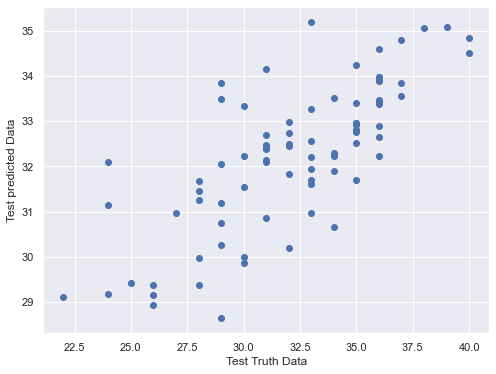

In [155]:
plt.scatter(y_test,elastic_pred)
plt.xlabel("Test Truth Data")
plt.ylabel("Test predicted Data")

In [156]:
## residuals
residuals=y_test-elastic_pred

In [157]:
residuals

162    2.107418
60     2.032263
61     3.356976
63     3.298066
69     2.034462
         ...   
169    0.434044
232   -4.853750
144    1.293811
208   -2.203997
105   -7.099752
Name: Temperature, Length: 81, dtype: float64

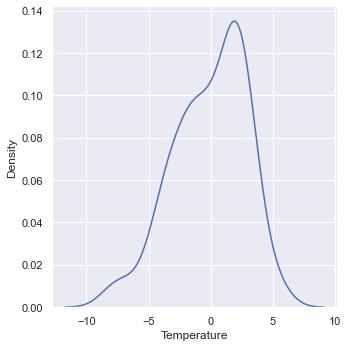

In [158]:
sns.displot(residuals,kind="kde")

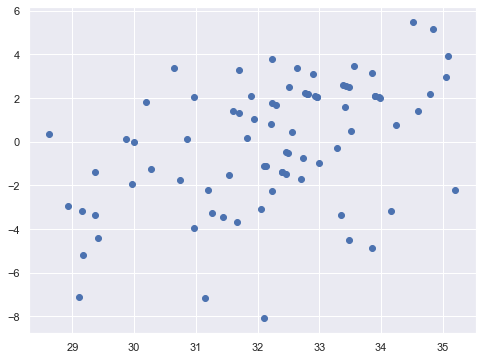

In [159]:
plt.scatter(elastic_pred , residuals)

**preformance Metrics**

In [160]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
print(mean_squared_error(y_test,elastic_pred))
print(mean_absolute_error(y_test,elastic_pred))
print(np.sqrt(mean_squared_error(y_test,elastic_pred)))

8.312748998634078
2.396178965477738
2.8831838301839303


**r square and adjusted R square**

In [161]:
## RSquared
from sklearn.metrics import r2_score
score=r2_score(y_test, reg_pred)
print(score)

0.5400944035274451


In [162]:
##Adjusted R square
#display adjusted R-squared
1 - (1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

0.48899378169716123

# Thank You